In [88]:
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
import os

In [89]:
# Inicialización de pesos y sesgos
np.random.seed(42)

In [90]:
# Generador de datos
def data_generator(board, boards, i):
    if i < 9:
        for value in [1, 0, -1]:  # Posibles valores
            new_board = board.copy()
            new_board[i] = value
            data_generator(new_board, boards, i + 1)
    else:
        boards.append(board)  # Solo añadimos al final de la generación
    return boards

In [91]:
# Función de activación tanh y su derivada
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

In [92]:
# Inicialización del dataset
input_data = np.array(data_generator([0] * 9, [], 0))
output_data = input_data.copy()  # Sin normalización adicional porque usamos tanh

# Normalización opcional de los datos
input_data = (input_data - np.mean(input_data)) / np.std(input_data)  # Normalización por si es necesario
output_data = (output_data - np.mean(output_data)) / np.std(output_data)

In [93]:
class TicTacToeNN:
    def __init__(self, input_size, hidden_size, output_size):

        # Layer size
        self.input_size = input_size
        self.hidden_size = hidden_size # Más neuronas para captar relaciones
        self.output_size = output_size

        # Weigths and bias
        self.weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
        self.weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
        self.bias_hidden = np.random.uniform(-1, 1, (1, hidden_size))
        self.bias_output = np.random.uniform(-1, 1, (1, output_size))

        self.loss = []
    
    def train(self, input_data, output_data, epochs, learning_rate, view_rate=None, view_graph = False):
        
        if view_graph:
            fig, ax = plt.subplots()

        for epoch in range(epochs):
            # Propagación hacia adelante
            hidden_layer_input = np.dot(input_data, self.weights_input_hidden) + self.bias_hidden
            hidden_layer_output = tanh(hidden_layer_input)

            output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output
            predicted_output = tanh(output_layer_input)

            # Cálculo del error
            error = output_data - predicted_output
            mse = np.mean(np.square(error))

            # Propagación hacia atrás
            d_predicted_output = error * tanh_derivative(predicted_output)
            error_hidden_layer = np.dot(d_predicted_output, self.weights_hidden_output.T)
            d_hidden_layer = error_hidden_layer * tanh_derivative(hidden_layer_output)

            # Actualización de pesos y sesgos
            self.weights_hidden_output += np.dot(hidden_layer_output.T, d_predicted_output) * learning_rate
            self.bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate

            self.weights_input_hidden += np.dot(input_data.T, d_hidden_layer) * learning_rate
            self.bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

            if view_rate:
                # Opcional: Imprimir el error cada 1000 épocas
                if epoch % view_rate == 0:
                    if view_graph:

                        self.loss.append(mse)

                        # Graficar la pérdida y el error en vivo
                        ax.clear()  # Limpiar el gráfico
                        ax.plot(self.loss, label="Pérdida (MSE)", color="blue")
                        ax.set_title(f"Epoch {epoch}/{epochs}    MSE: {mse}")
                        ax.set_xlabel(f"Épocas (cada {view_rate})")
                        ax.set_ylabel("Pérdida / Error")
                        ax.legend()

                        display.clear_output(wait=True)  # Limpiar salida en Jupyter
                        display.display(plt.gcf())  # Mostrar la figura
                    else:
                        print(f"Epoch {epoch}/{epochs} - MSE: {mse}")
        plt.clf()
        # Opcional: Imprimir el error final
        print(f"Error final (MSE): {mse}")

    def predict(self, input_data):
            
            hidden_layer_input = np.dot(input_data, self.weights_input_hidden) + self.bias_hidden
            hidden_layer_output = tanh(hidden_layer_input)

            output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output
            predicted_output = tanh(output_layer_input)

            return predicted_output

    def save(self):
        np.save("weights_input_hidden.npy", self.weights_input_hidden)
        np.save("bias_hidden.npy", self.bias_hidden)
        np.save("weights_hidden_output.npy", self.weights_hidden_output)
        np.save("bias_output.npy", self.bias_output)

    def load(self):
        if os.path.exists("weights_input_hidden.npy") and os.path.exists("bias_hidden.npy") and os.path.exists("weights_hidden_output.npy") and os.path.exists("bias_output.npy"):
            self.weights_input_hidden = np.load("weights_input_hidden.npy")
            self.bias_hidden = np.load("bias_hidden.npy")
            self.weights_hidden_output = np.load("weights_hidden_output.npy")
            self.bias_output = np.load("bias_output.npy")
            print("Archivos cargados correctamente.")
        else:
            print("No se han encontrado los archivos guardados")

In [124]:
INPUT_SIZE = 9
HIDDEN_SIZE = 18
OUTPUT_SIZE = 9
EPOCHS = 20000
LEARNING_RATE = 0.1
VIEW_RATE = 100

In [125]:
NN = TicTacToeNN(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE)


In [126]:
# NN.load()

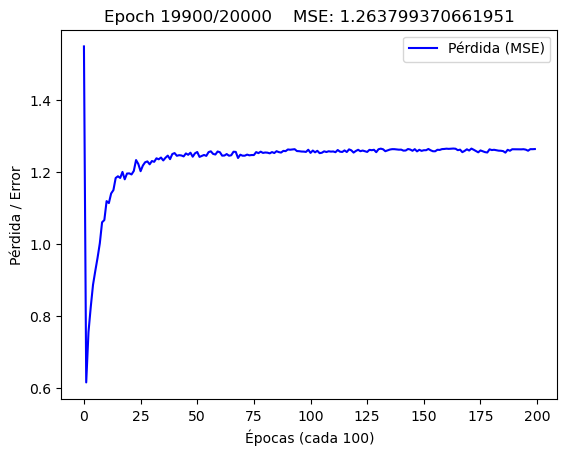

Error final (MSE): 1.263698587049438


<Figure size 640x480 with 0 Axes>

In [127]:
NN.train(input_data, output_data, EPOCHS, LEARNING_RATE, VIEW_RATE, view_graph=True)

In [128]:
NN.save()